In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [42]:
np.random.seed(0)
n_pts = 500
#here X will have all the points and y will just have their labels
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2) #1.,2. get the same random number each time,3. standard deviation, 4.the ratio of outer circle radius to inner circle radius

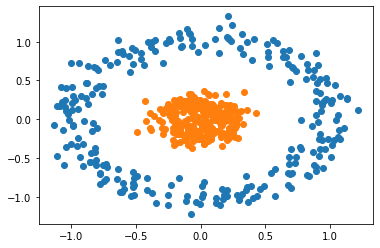

In [43]:
plt.scatter(X[y==0, 0], X[y==0, 1]) #grab the x cord of data labelled as 0, grab the y cord of data labelled as 0
plt.scatter(X[y==1, 0], X[y==1, 1])

In [44]:
model = Sequential()
#think that each perceptron forms a line, since we need a circle we need 4 line(or 3)to classify 
model.add(Dense(4, input_shape=(2,), activation='sigmoid')) #up to the hidden layer
model.add(Dense(1, activation='sigmoid')) #up to the output
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics='accuracy') #binary_crossentropy cuz our data is labelled as either 1 or 0

In [45]:
model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.5096
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5410
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.6191
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.3494
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5342
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.6573
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6516
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5670
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.6245
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6255
Epoch 11/

Prediction is:  [[0.95914686]]


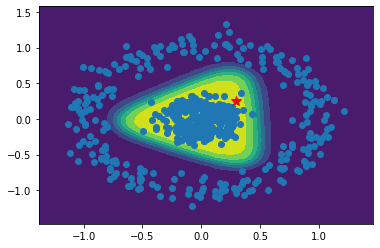

In [46]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25) #select 50 equally distributed points between the lowest Xcordinate and highest Xcordinate
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25) #""for Y; by +- 1 we are making our grid more spacious
    xx, yy = np.meshgrid(x_span, y_span) #(xx and yy are made 2d array)since we got 50 elements in xx, this func will make a 50x50 grid/matrix of that by repeating the one unique row 50 times, for the second argument, unique 50 column element of yy is repeated 50 times
    xx1D, yy1D = xx.ravel(), yy.ravel() #xx and yy are made 1d here with 50x50 elements. In xx elements are repeated after 49 other numbers in sequence, single element in yy is repeated 50 times then another element is repeated 50 times.
    grid = np.c_[xx1D, yy1D] #c_ concatenates elements in a column
    
    predictions = model.predict(grid) #it tests every points in this grid for its probability of being 1 or 0 as we labeled. ?so we are also testing the points which are not in our initial data set?
    z = predictions.reshape(xx.shape)
    
    plt.contourf(xx, yy, z)

plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.3
y = 0.25
point = np.array([[x,y]])
predictThisPoint = model.predict(point)
plt.plot([x],[y], marker = "*", markersize=10, color="red")
print('Prediction is: ', predictThisPoint)